In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import random
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from tensorflow.keras.optimizers import Adam

In [146]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [147]:
df = pd.read_csv(r'F:\tellmewaee\cse\cse428\PROJECT\PROJECT\DATASET\sports.csv')

In [148]:
train_count = len(df[df['data set'] == 'train'])
test_count = len(df[df['data set'] == 'test'])
valid_count = len(df[df['data set'] == 'valid'])

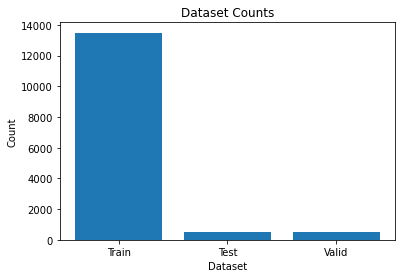

In [149]:
dataset_labels = ['Train', 'Test', 'Valid']
dataset_counts = [train_count, test_count, valid_count]

plt.bar(dataset_labels, dataset_counts)

plt.title('Dataset Counts')
plt.xlabel('Dataset')
plt.ylabel('Count')

plt.show()

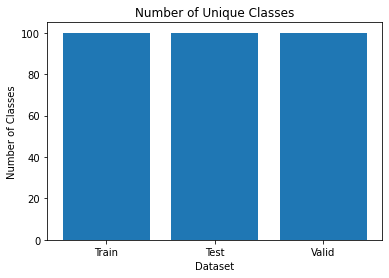

In [150]:
train_classes = df[df['data set'] == 'train']['labels'].nunique()
test_classes = df[df['data set'] == 'test']['labels'].nunique()
valid_classes = df[df['data set'] == 'valid']['labels'].nunique()

dataset_labels = ['Train', 'Test', 'Valid']
dataset_classes = [train_classes, test_classes, valid_classes]

plt.bar(dataset_labels, dataset_classes)

plt.title('Number of Unique Classes')
plt.xlabel('Dataset')
plt.ylabel('Number of Classes')

plt.show()

# TRAIN

In [151]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [152]:
train_generator = train_datagen.flow_from_directory(
    r'F:\tellmewaee\cse\cse428\PROJECT\PROJECT\DATASET\train',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    r'F:\tellmewaee\cse\cse428\PROJECT\PROJECT\DATASET\valid',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [153]:
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

# Output layer for 100 classes
model.add(layers.Dense(100, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 26, 26, 128)     

In [154]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping]
)

model.save('model.h5')

Epoch 1/50
843/843 [==============================] - 370s 438ms/step - loss: 4.5464 - accuracy: 0.0514 - val_loss: 3.9064 - val_accuracy: 0.1210
Epoch 2/50
843/843 [==============================] - 376s 445ms/step - loss: 3.8211 - accuracy: 0.1296 - val_loss: 3.3292 - val_accuracy: 0.2399
Epoch 3/50
843/843 [==============================] - 373s 442ms/step - loss: 3.5184 - accuracy: 0.1892 - val_loss: 3.0760 - val_accuracy: 0.2903
Epoch 4/50
843/843 [==============================] - 377s 447ms/step - loss: 3.3143 - accuracy: 0.2277 - val_loss: 2.8568 - val_accuracy: 0.3246
Epoch 5/50
843/843 [==============================] - 384s 455ms/step - loss: 3.1489 - accuracy: 0.2656 - val_loss: 2.6178 - val_accuracy: 0.3911
Epoch 6/50
843/843 [==============================] - 380s 450ms/step - loss: 3.0231 - accuracy: 0.2878 - val_loss: 2.5244 - val_accuracy: 0.4032
Epoch 7/50
843/843 [==============================] - 379s 449ms/step - loss: 2.9193 - accuracy: 0.3217 - val_loss: 2.4291 -

E:\Programs\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


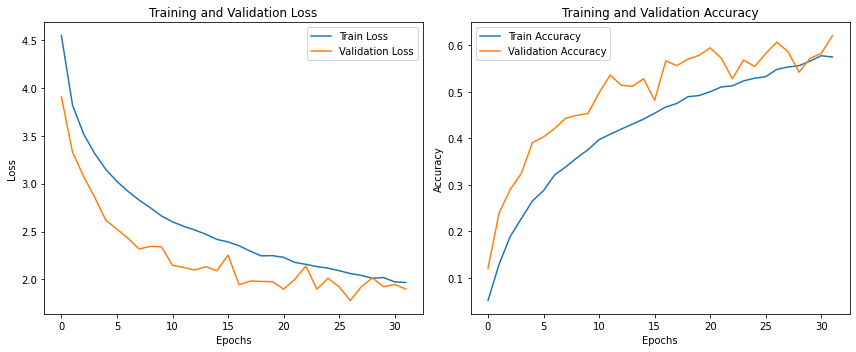

In [155]:
# Plotting Training and Validation Loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout
plt.show()


In [156]:
# Test data generator
test_generator = valid_datagen.flow_from_directory(
    r'F:\tellmewaee\cse\cse428\PROJECT\PROJECT\DATASET\test',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Ensure the data order matches the true labels
)


Found 500 images belonging to 100 classes.


In [157]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

31/31 [==============================] - 3s 82ms/step - loss: 1.7856 - accuracy: 0.6129
Test Loss: 1.7855945825576782
Test Accuracy: 0.6129032373428345


In [158]:
# Predict on test data, using np.ceil() to ensure the final incomplete batch is included
Y_pred = model.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Ensure lengths of Y_true and Y_pred_classes match
Y_true = test_generator.classes

32/32 [==============================] - 3s 78ms/step


In [159]:
print(f"Length of Y_true: {len(Y_true)}")
print(f"Length of Y_pred_classes: {len(Y_pred_classes)}")


Length of Y_true: 500
Length of Y_pred_classes: 500


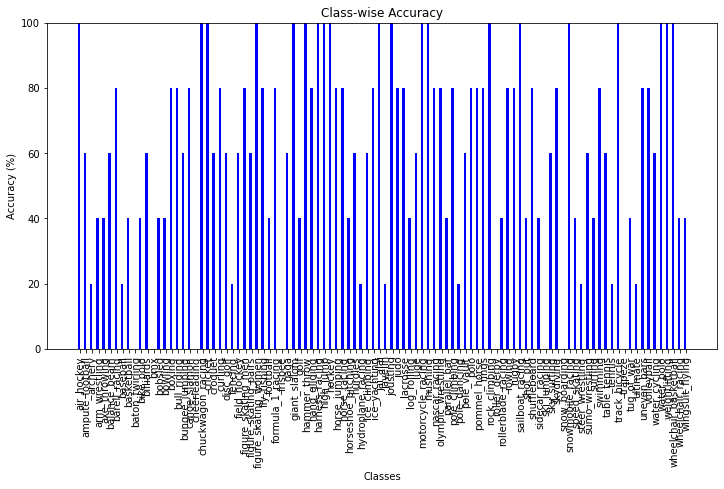

In [160]:
# Assuming Y_true and Y_pred_classes are already defined
class_labels = list(test_generator.class_indices.keys())

# Assuming Y_pred_classes is a 1D array of predicted class labels
class_labels = list(test_generator.class_indices.keys())
num_classes = len(class_labels)

# Initialize a list to hold accuracies for each class
class_accuracies = []

# Calculate accuracy for each class
for i in range(num_classes):
    # Get indices for the current class
    indices = np.where(Y_true == i)[0]  # Using the index of the class
    # Calculate the number of correct predictions for this class
    correct_predictions = np.sum(Y_pred_classes[indices] == i)
    # Calculate accuracy for this class
    accuracy = correct_predictions / len(indices) if len(indices) > 0 else 0
    class_accuracies.append(accuracy)

# Convert to percentage (now class_accuracies will be between 0 and 100)
class_accuracies_percentage = [acc * 100 for acc in class_accuracies]

# Plotting
plt.figure(figsize=(12, 6))
# Adjust bar width and add spacing
bar_width = 0.4  # Decrease width for more spacing
x = np.arange(num_classes)  # Create an array of indices for the x-axis

plt.bar(x, class_accuracies_percentage, color='blue', width=bar_width)

# Set the x-ticks to be in the center of the bars and rotate them
plt.xticks(x + bar_width / 2, class_labels, rotation=90)
plt.title('Class-wise Accuracy')
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

plt.show()


In [161]:
# Generate classification report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(Y_true, Y_pred_classes, target_names=class_labels))

                       precision    recall  f1-score   support

           air_hockey       1.00      1.00      1.00         5
      ampute_football       0.60      0.60      0.60         5
              archery       0.50      0.20      0.29         5
        arm_wrestling       0.67      0.40      0.50         5
         axe_throwing       1.00      0.40      0.57         5
         balance_beam       0.60      0.60      0.60         5
        barell_racing       1.00      0.80      0.89         5
             baseball       0.33      0.20      0.25         5
           basketball       0.33      0.40      0.36         5
       baton_twirling       0.00      0.00      0.00         5
            bike_polo       1.00      0.40      0.57         5
            billiards       1.00      0.60      0.75         5
                  bmx       0.00      0.00      0.00         5
              bobsled       1.00      0.40      0.57         5
              bowling       0.67      0.40      0.50  

E:\Programs\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Programs\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Programs\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


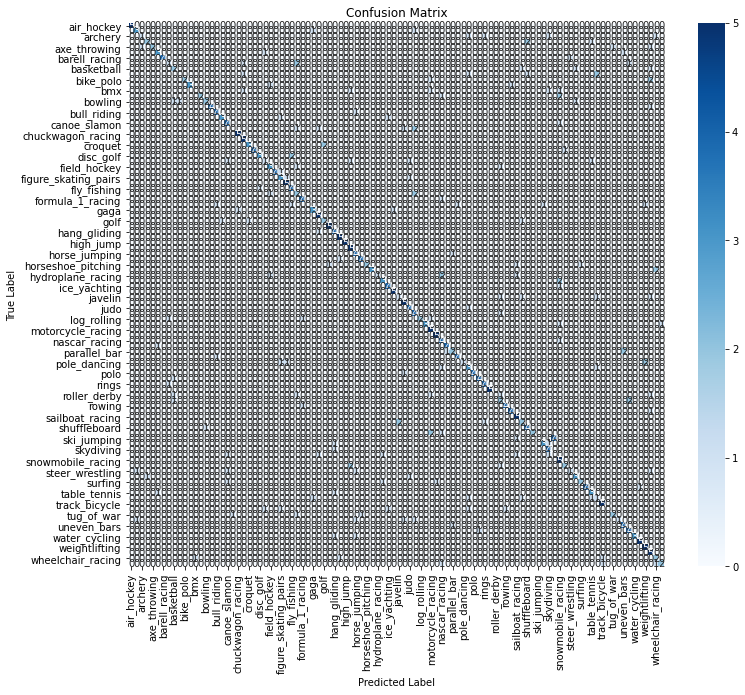

In [162]:
import seaborn as sns
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [163]:
# Class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate class-wise accuracy
class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print accuracy for each class
for i, class_label in enumerate(class_labels):
    print(f"Accuracy for class '{class_label}': {class_wise_accuracy[i]:.2f}")

Accuracy for class 'air_hockey': 1.00
Accuracy for class 'ampute_football': 0.60
Accuracy for class 'archery': 0.20
Accuracy for class 'arm_wrestling': 0.40
Accuracy for class 'axe_throwing': 0.40
Accuracy for class 'balance_beam': 0.60
Accuracy for class 'barell_racing': 0.80
Accuracy for class 'baseball': 0.20
Accuracy for class 'basketball': 0.40
Accuracy for class 'baton_twirling': 0.00
Accuracy for class 'bike_polo': 0.40
Accuracy for class 'billiards': 0.60
Accuracy for class 'bmx': 0.00
Accuracy for class 'bobsled': 0.40
Accuracy for class 'bowling': 0.40
Accuracy for class 'boxing': 0.80
Accuracy for class 'bull_riding': 0.80
Accuracy for class 'bungee_jumping': 0.60
Accuracy for class 'canoe_slamon': 0.80
Accuracy for class 'cheerleading': 0.00
Accuracy for class 'chuckwagon_racing': 1.00
Accuracy for class 'cricket': 1.00
Accuracy for class 'croquet': 0.60
Accuracy for class 'curling': 0.80
Accuracy for class 'disc_golf': 0.60
Accuracy for class 'fencing': 0.20
Accuracy for c